### AlimConfiance Groupe 4 : Audrey, Jaufret, Babacar

## Extract_Transformation_AlimConfiance BDD

## 1.PREPARATION DES DONNEES

1. Importation des librairies et du dataset

In [90]:
#Importation des librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from IPython.display import display
from sklearn import preprocessing

# Importation du dataset depuis bdd dans Jupyter Notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from database.Classes import Connection

db = Connection.connection_to_database()
requete_libelle = 'select e.libelle, da.libelle_activite, ta.type_activite, e.code_postal, e.agrement, nh.niveau_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene;'
requete_id = 'select e.id_etablissement, da.id_activite, ta.id_type_activite, e.code_postal, e.agrement, nh.id_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene;'

dataset = Connection.query_all(db, requete_id) 
df = pd.DataFrame(dataset, columns=['id_etablissement','id_activite', 'id_type_activite', 'code_postal','agrement','niveau_hygiene'])

# Affichage des données
df.head()


Connecting to the PostgreSQL database...
Connection successful


Query successful: select e.id_etablissement, da.id_activite, ta.id_type_activite, e.code_postal, e.agrement, nh.id_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene; 



,id_etablissement,id_activite,id_type_activite,code_postal,agrement,niveau_hygiene
0,0,0,0,92240,,0
1,0,19,0,92240,,0
2,0,31,0,92240,,0
3,1,1,0,69500,,1
4,0,0,0,92240,,1


2. Affichage des informations descriptives relatives aux variables

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84257 entries, 0 to 84256
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_etablissement  84257 non-null  int64 
 1   id_activite       84257 non-null  int64 
 2   id_type_activite  84257 non-null  int64 
 3   code_postal       84257 non-null  object
 4   agrement          84257 non-null  object
 5   niveau_hygiene    84257 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


3. Supression des colonnes jugées non pertinentes

In [92]:
#df.drop('id_etablissement', axis=1, inplace=True)
# Verifications
df.head()

,id_etablissement,id_activite,id_type_activite,code_postal,agrement,niveau_hygiene
0,0,0,0,92240,,0
1,0,19,0,92240,,0
2,0,31,0,92240,,0
3,1,1,0,69500,,1
4,0,0,0,92240,,1


3. Conversion des valeurs

In [93]:
# code_postal
# Récupération du département dans le code postal (suppression des 3 dernier chiffres)
df['code_postal'] = df['code_postal'].apply(lambda x: str(x)[:2])
df['code_postal'] = df['code_postal'].astype(int)


In [94]:

# agrement
# Remplace les valeurs abs par des 0 dans la colonne
#df['agrement'] = df['agrement'].fillna(0)
# Change le type de données en string (passage obligatoire car présence de lettre dans les agréments)
#df['agrement']=df['agrement'].astype(str)
# Remplace les valeurs autre que 0 par 1 et converti la colonne en int
#df['agrement'] = (df['agrement'] != 0).astype(int)
# Verifications
#df.head()

In [95]:
#SAVE_CSV_FILEPATH =(r"C:\Users\diaba\Documents\SimplonIAMicrosoft_21-23\AlimConfiance\IASecuAlim\modele\data\clean\AlimConfiance_BDD_Clean.csv")
SAVE_CSV_FILEPATH =("data/clean/AlimConfiance_BDD_Clean.csv")

df.to_csv(path_or_buf=SAVE_CSV_FILEPATH, sep=';', index=False)


## 2.EXPLORATION DES DONNEES

In [96]:
for column in df.columns:
    print(column, df[column].nunique())

id_etablissement 24629
id_activite 72
id_type_activite 7
code_postal 90
agrement 5691
niveau_hygiene 4


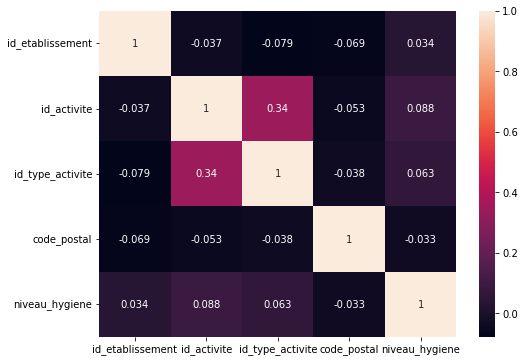

In [99]:
# Affichage de la matrice de correlation
mat_corr = df.corr()
# en utilisant seaborn
plt.figure(figsize=(8,6))
sns.heatmap(mat_corr, annot=True) # avec seaborn
plt.savefig('data/matrice_correlation.png')

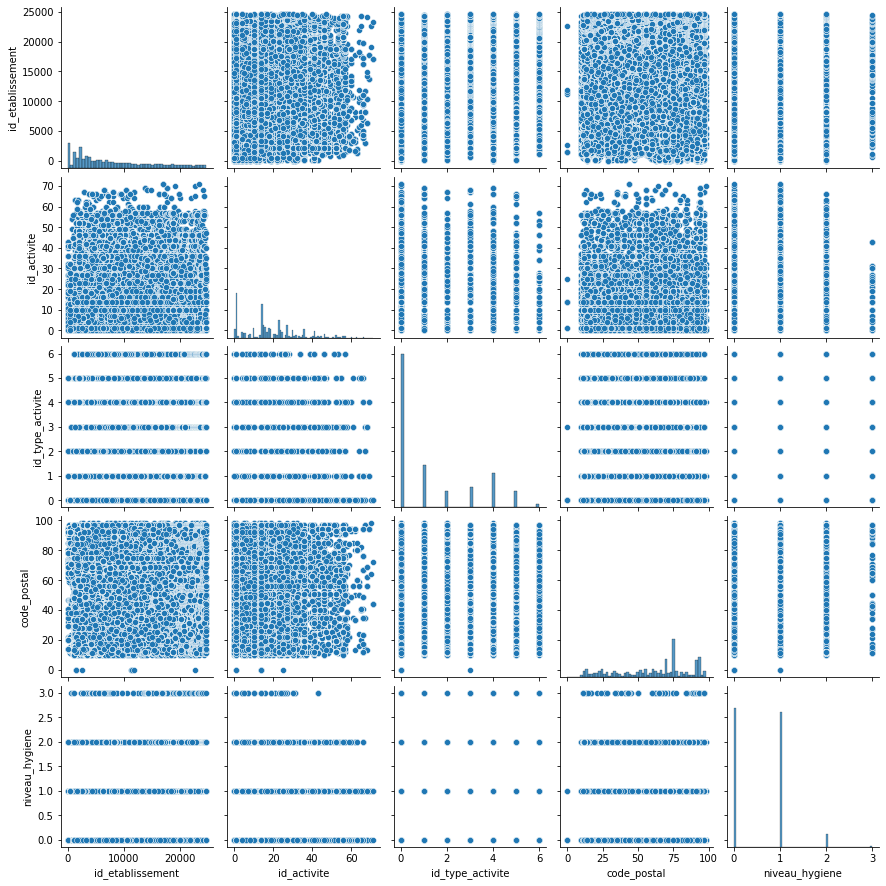

In [101]:
sns_plot = sns.pairplot(df)
sns_plot.savefig('data/pairplot.png')

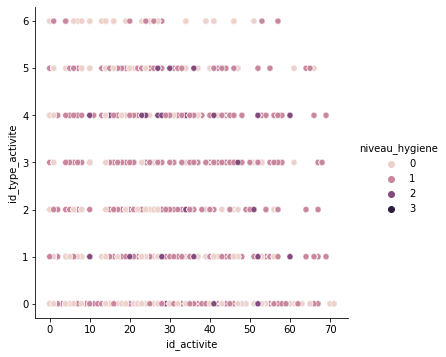

In [107]:
sns_plot_activite = sns.pairplot(df, x_vars=['id_activite'], y_vars=['id_type_activite'], hue='niveau_hygiene', height=5)
sns_plot_activite.savefig('data/pairplot_activite.png')

<AxesSubplot:title={'center':'Relation Activite et Hygiene'}, xlabel='id_activite'>

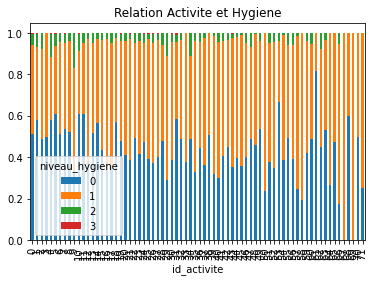

In [109]:
activite_hygiene = pd.crosstab(df.id_activite, df.niveau_hygiene)
activite_hygiene.div(activite_hygiene.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title="Relation Activite et Hygiene")